In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
df=pd.read_csv("cleaned_titanic.csv")

In [6]:
df.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,1,38.0,1,0,71.2833,False,False,False
2,2,1,3,26.0,0,0,7.9250,False,False,True
3,3,1,1,35.0,1,0,53.1000,False,False,True
4,4,0,3,35.0,0,0,8.0500,True,False,True


In [7]:
df.isna().sum()

Unnamed: 0    0
Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [11]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [15]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(df)

In [16]:
X_scaled

array([[-0.78927234,  0.82737724, -0.5924806 , ...,  0.73769513,
        -0.30756234,  0.61583843],
       [ 1.2669898 , -1.56610693,  0.63878901, ..., -1.35557354,
        -0.30756234, -1.62380254],
       [ 1.2669898 ,  0.82737724, -0.2846632 , ..., -1.35557354,
        -0.30756234,  0.61583843],
       ...,
       [-0.78927234,  0.82737724,  0.        , ..., -1.35557354,
        -0.30756234,  0.61583843],
       [ 1.2669898 , -1.56610693, -0.2846632 , ...,  0.73769513,
        -0.30756234, -1.62380254],
       [-0.78927234,  0.82737724,  0.17706291, ...,  0.73769513,
         3.25137334, -1.62380254]])

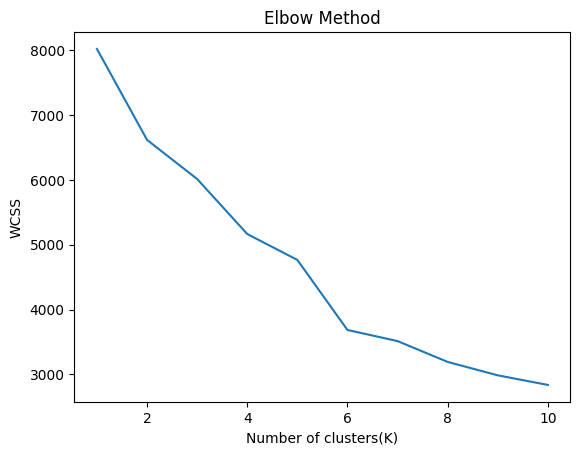

In [17]:
wcss=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.xlabel("Number of clusters(K)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

In [35]:
kmeans=KMeans(
    n_clusters=2,
    init='k-means++',
    random_state=42
)
kmeans.fit(X_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [36]:
df["Cluster"]=kmeans.labels_
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cluster
0,0,3,22.0,1,0,7.2500,True,False,True,0
1,1,1,38.0,1,0,71.2833,False,False,False,1
2,1,3,26.0,0,0,7.9250,False,False,True,1
3,1,1,35.0,1,0,53.1000,False,False,True,1
4,0,3,35.0,0,0,8.0500,True,False,True,0


In [37]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Cluster
0,0,3,22.000000,1,0,7.2500,True,False,True,0
1,1,1,38.000000,1,0,71.2833,False,False,False,1
2,1,3,26.000000,0,0,7.9250,False,False,True,1
3,1,1,35.000000,1,0,53.1000,False,False,True,1
4,0,3,35.000000,0,0,8.0500,True,False,True,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,True,False,True,0
887,1,1,19.000000,0,0,30.0000,False,False,True,1
888,0,3,29.699118,1,2,23.4500,False,False,True,0
889,1,1,26.000000,0,0,30.0000,True,False,False,1


In [38]:
centers=kmeans.cluster_centers_
print("Cluster Centers(scaled):\n",centers)

Cluster Centers(scaled):
 [[-0.59913851  0.33966386  0.00574759  0.00864366 -0.15697118 -0.28645888
   0.47962091 -0.00895301  0.12879321]
 [ 1.13972928 -0.64613581 -0.01093352 -0.01644266  0.29860315  0.54492504
  -0.91237333  0.01703114 -0.24500077]]


In [39]:
centers_original=scaler.inverse_transform(centers)
print("Cluster Centers(original scale):\n",centers_original)

Cluster Centers(original scale):
 [[ 0.09246575  2.59246575 29.7738059   0.53253425  0.25513699 17.97707449
   0.87671233  0.08390411  0.78253425]
 [ 0.93811075  1.76872964 29.55703966  0.50488599  0.62214984 59.2682013
   0.21172638  0.09120521  0.61563518]]


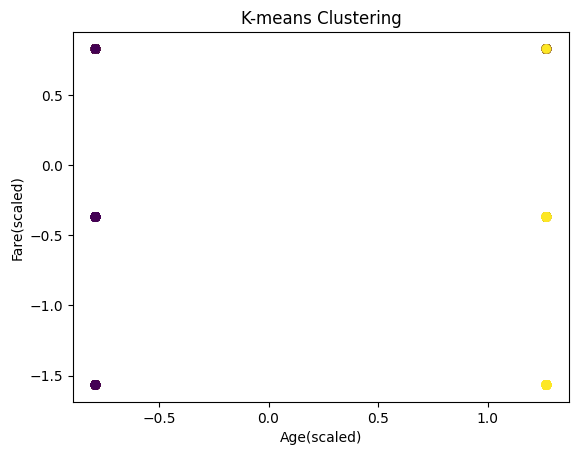

In [42]:
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=df['Cluster'])
#plt.scatter(centers[:,0],centers[:,1],marker='X',s=200)
plt.xlabel("Age(scaled)")
plt.ylabel("Fare(scaled)")
plt.title("K-means Clustering")
plt.show()

In [41]:
X_scaled[:,1]

array([ 0.82737724, -1.56610693,  0.82737724, -1.56610693,  0.82737724,
        0.82737724, -1.56610693,  0.82737724,  0.82737724, -0.36936484,
        0.82737724, -1.56610693,  0.82737724,  0.82737724,  0.82737724,
       -0.36936484,  0.82737724, -0.36936484,  0.82737724,  0.82737724,
       -0.36936484, -0.36936484,  0.82737724, -1.56610693,  0.82737724,
        0.82737724,  0.82737724, -1.56610693,  0.82737724,  0.82737724,
       -1.56610693, -1.56610693,  0.82737724, -0.36936484, -1.56610693,
       -1.56610693,  0.82737724,  0.82737724,  0.82737724,  0.82737724,
        0.82737724, -0.36936484,  0.82737724, -0.36936484,  0.82737724,
        0.82737724,  0.82737724,  0.82737724,  0.82737724,  0.82737724,
        0.82737724,  0.82737724, -1.56610693, -0.36936484, -1.56610693,
       -1.56610693, -0.36936484,  0.82737724, -0.36936484,  0.82737724,
        0.82737724, -1.56610693, -1.56610693,  0.82737724, -1.56610693,
        0.82737724, -0.36936484,  0.82737724,  0.82737724,  0.82